In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve, StratifiedKFold
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFECV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
iris.shape

(150, 5)

In [3]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [5]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

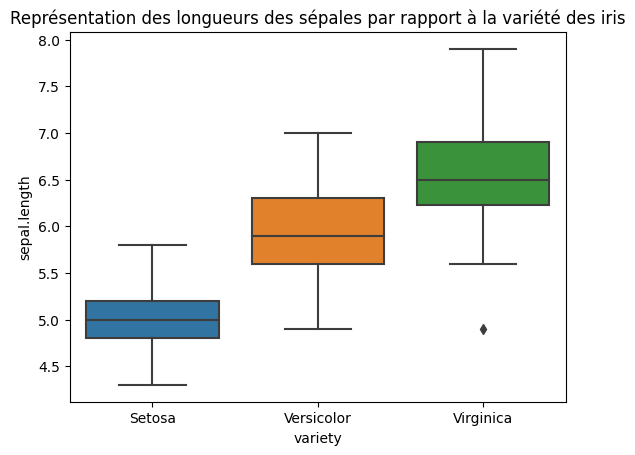

In [14]:
sns.boxplot(data=iris,y='sepal.length', x='variety')
plt.title('Représentation des longueurs des sépales par rapport à la variété des iris');

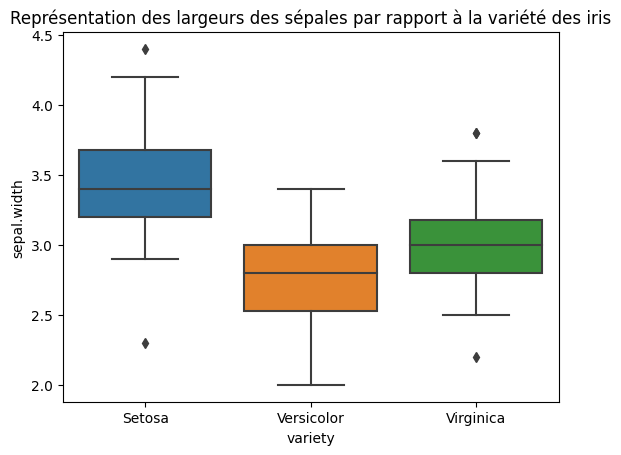

In [15]:
sns.boxplot(data=iris,y='sepal.width', x='variety')
plt.title('Représentation des largeurs des sépales par rapport à la variété des iris');

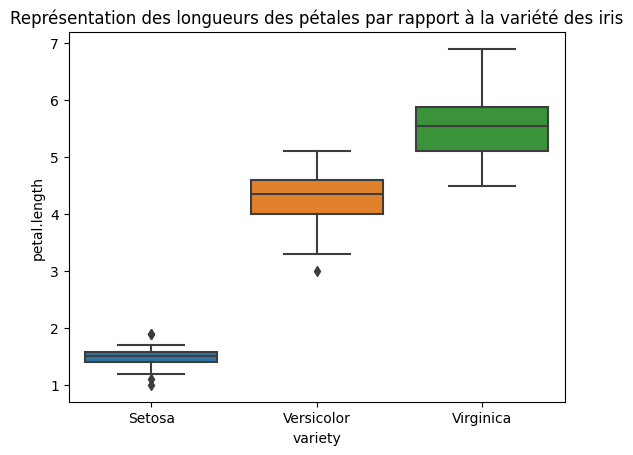

In [16]:
sns.boxplot(data=iris,y='petal.length', x='variety')
plt.title('Représentation des longueurs des pétales par rapport à la variété des iris');

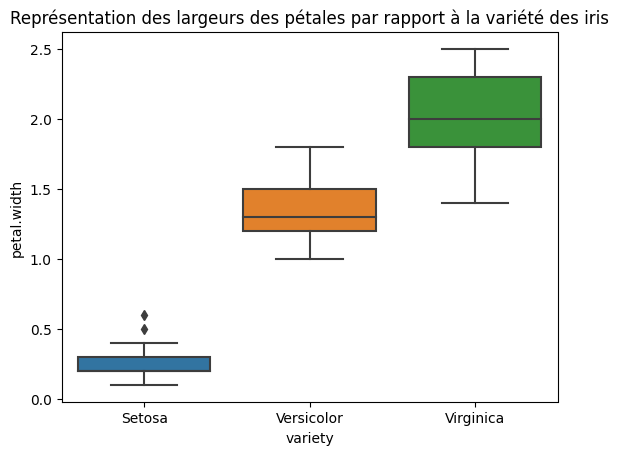

In [17]:
sns.boxplot(data=iris,y='petal.width', x='variety')
plt.title('Représentation des largeurs des pétales par rapport à la variété des iris');

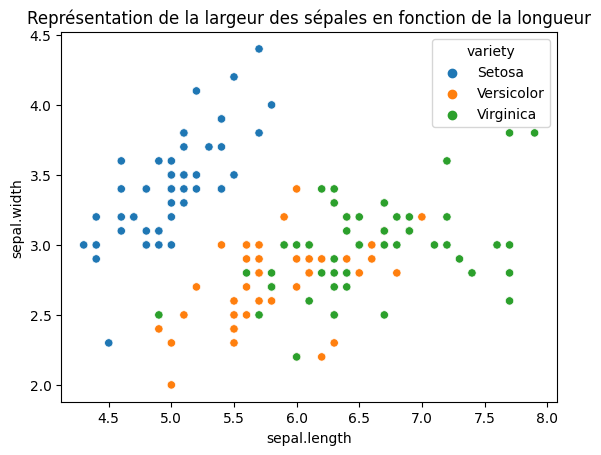

In [24]:
sns.scatterplot(data=iris,x='sepal.length',y='sepal.width',hue='variety')
plt.title('Représentation de la largeur des sépales en fonction de la longueur');

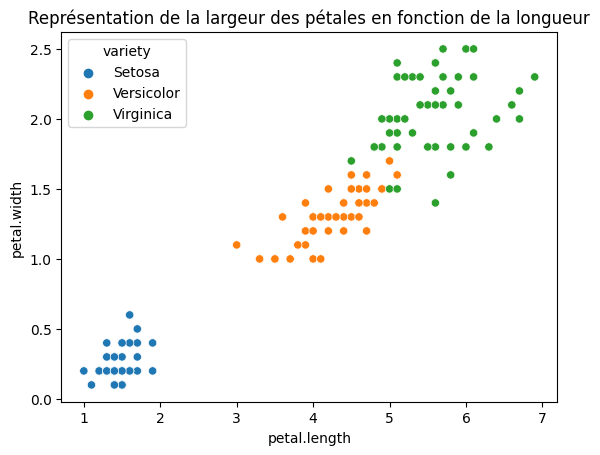

In [25]:
sns.scatterplot(data=iris,x='petal.length',y='petal.width',hue='variety')
plt.title('Représentation de la largeur des pétales en fonction de la longueur');

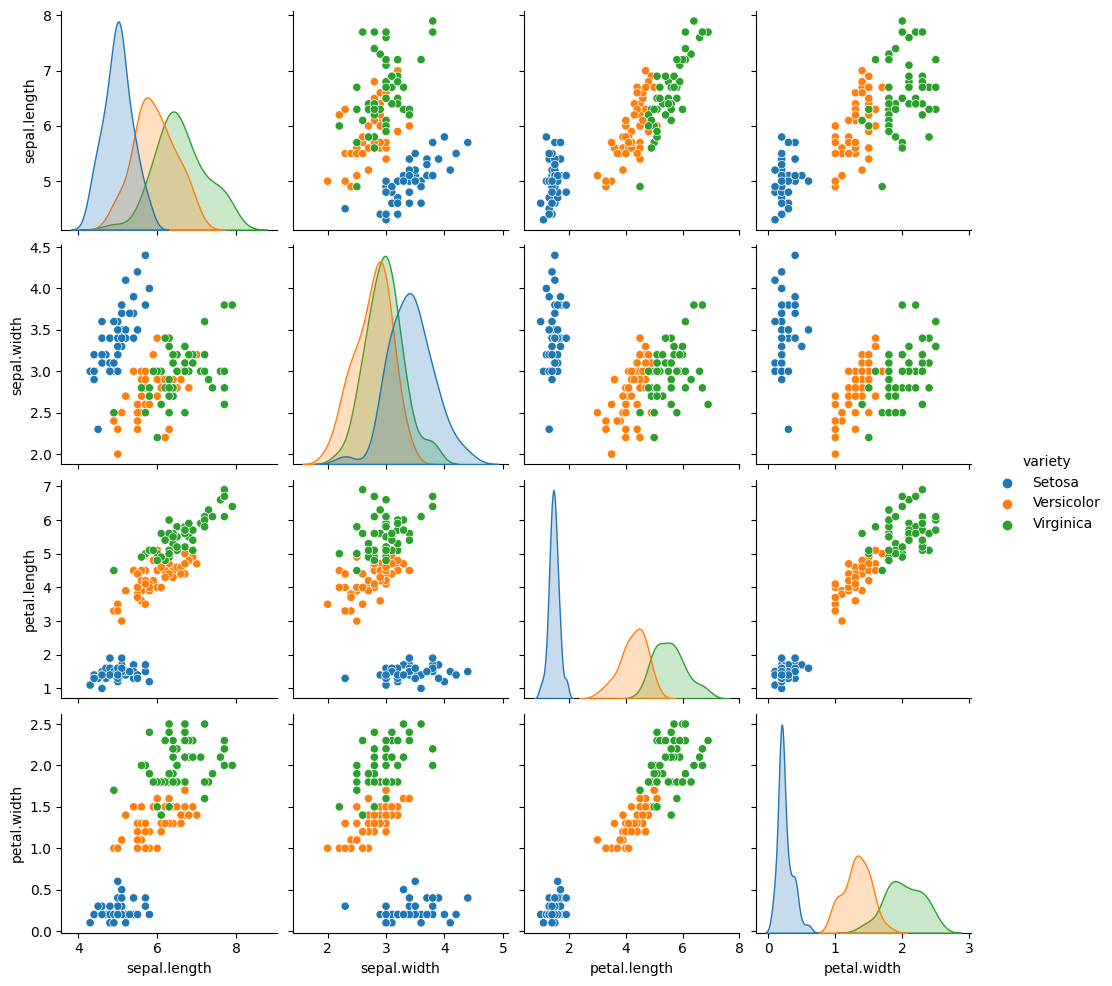

In [23]:
sns.pairplot(iris,hue='variety');

In [51]:
pearson = iris.corr(method='pearson')
pearson

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


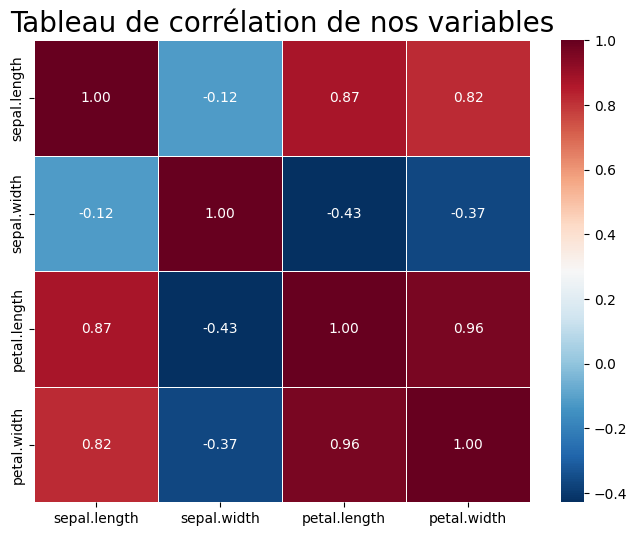

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5,
           fmt='.2f')

plt.title('Tableau de corrélation de nos variables',fontsize=20);

In [30]:
X = iris.iloc[:,:4]
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_scaled.head()

,sepal.length,sepal.width,petal.length,petal.width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [73]:
y = iris['variety']
y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

In [74]:
le = LabelEncoder()
y_label= le.fit_transform(y)

In [75]:
y = pd.DataFrame(y_label, index=y.index)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [181]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [168]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 1), (45, 1))

In [169]:
y_train.value_counts()

2    39
0    34
1    32
dtype: int64

In [175]:
lr = LogisticRegression()

gnb = GaussianNB()

dtc = tree.DecisionTreeClassifier()

rfc = RandomForestClassifier()

cbc = CatBoostClassifier()

lgbmc = LGBMClassifier()

xgbc = XGBClassifier()

In [176]:
models = [lr, gnb, dtc, rfc, cbc, lgbmc, xgbc]

In [177]:
def train_models(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    metrics = {
      'AUC': round(roc_auc_score(y_test, model.predict_proba(X_test),multi_class='ovr',average='micro'),2),
      'Accuracy': round(accuracy_score(y_test, model.predict(X_test)),2),
      'Precision': round(precision_score(y_test, model.predict(X_test),average='micro'),2),
      'Recall': round(recall_score(y_test, model.predict(X_test),average='micro'),2),
      'F1': round(f1_score(y_test, model.predict(X_test),average='micro'),2)
    }
    return metrics

In [178]:
%%time

name = []
auc = []
accuracy = []
precision = []
recall = []
f1 = []
time_ = []

for model in models:
    start = time.time()
    results = train_models(model, X_train, X_test, y_train, y_test)

    name.append(type(model).__name__)
    auc.append(results['AUC'])
    accuracy.append(results['Accuracy'])
    precision.append(results['Precision'])
    recall.append(results['Recall'])
    f1.append(results['F1'])
    time_.append(time.time()-start)

#Initialise data of lists
base_models = pd.DataFrame(data=[name, auc, accuracy, precision, recall, f1, time_]).T
base_models.columns = ['Model', 'AUC', 'Accuracy', 'Precision', 'Recall', 'F1', 'Time']

Learning rate set to 0.070535
0:	learn: 1.0160276	total: 860us	remaining: 860ms
1:	learn: 0.9581446	total: 1.57ms	remaining: 784ms
2:	learn: 0.9022476	total: 2.25ms	remaining: 747ms
3:	learn: 0.8519437	total: 3.12ms	remaining: 776ms
4:	learn: 0.7992253	total: 3.37ms	remaining: 671ms
5:	learn: 0.7568161	total: 4.13ms	remaining: 684ms
6:	learn: 0.7169400	total: 4.81ms	remaining: 682ms
7:	learn: 0.6740063	total: 5.3ms	remaining: 657ms
8:	learn: 0.6372905	total: 6.02ms	remaining: 663ms
9:	learn: 0.6056187	total: 6.75ms	remaining: 668ms
10:	learn: 0.5728117	total: 7.36ms	remaining: 661ms
11:	learn: 0.5465816	total: 7.88ms	remaining: 649ms
12:	learn: 0.5203249	total: 8.61ms	remaining: 653ms
13:	learn: 0.4937328	total: 8.99ms	remaining: 633ms
14:	learn: 0.4720071	total: 9.52ms	remaining: 625ms
15:	learn: 0.4499197	total: 10.3ms	remaining: 631ms
16:	learn: 0.4327122	total: 11ms	remaining: 633ms
17:	learn: 0.4168379	total: 11.5ms	remaining: 628ms
18:	learn: 0.4029169	total: 12.1ms	remaining: 62

292:	learn: 0.0197391	total: 170ms	remaining: 410ms
293:	learn: 0.0196399	total: 171ms	remaining: 410ms
294:	learn: 0.0195604	total: 171ms	remaining: 410ms
295:	learn: 0.0194699	total: 172ms	remaining: 409ms
296:	learn: 0.0193878	total: 173ms	remaining: 408ms
297:	learn: 0.0193181	total: 173ms	remaining: 408ms
298:	learn: 0.0192507	total: 174ms	remaining: 407ms
299:	learn: 0.0191633	total: 174ms	remaining: 406ms
300:	learn: 0.0190858	total: 175ms	remaining: 405ms
301:	learn: 0.0190076	total: 175ms	remaining: 405ms
302:	learn: 0.0189307	total: 176ms	remaining: 404ms
303:	learn: 0.0188611	total: 176ms	remaining: 403ms
304:	learn: 0.0188076	total: 177ms	remaining: 403ms
305:	learn: 0.0187463	total: 177ms	remaining: 402ms
306:	learn: 0.0186838	total: 178ms	remaining: 402ms
307:	learn: 0.0186214	total: 179ms	remaining: 403ms
308:	learn: 0.0185384	total: 180ms	remaining: 402ms
309:	learn: 0.0184855	total: 180ms	remaining: 401ms
310:	learn: 0.0184342	total: 181ms	remaining: 401ms
311:	learn: 

656:	learn: 0.0076863	total: 353ms	remaining: 184ms
657:	learn: 0.0076745	total: 354ms	remaining: 184ms
658:	learn: 0.0076573	total: 354ms	remaining: 183ms
659:	learn: 0.0076439	total: 355ms	remaining: 183ms
660:	learn: 0.0076305	total: 355ms	remaining: 182ms
661:	learn: 0.0076202	total: 356ms	remaining: 182ms
662:	learn: 0.0076048	total: 356ms	remaining: 181ms
663:	learn: 0.0075914	total: 357ms	remaining: 181ms
664:	learn: 0.0075747	total: 358ms	remaining: 180ms
665:	learn: 0.0075594	total: 358ms	remaining: 180ms
666:	learn: 0.0075492	total: 359ms	remaining: 179ms
667:	learn: 0.0075307	total: 359ms	remaining: 178ms
668:	learn: 0.0075197	total: 360ms	remaining: 178ms
669:	learn: 0.0075015	total: 360ms	remaining: 177ms
670:	learn: 0.0074852	total: 361ms	remaining: 177ms
671:	learn: 0.0074737	total: 361ms	remaining: 176ms
672:	learn: 0.0074594	total: 362ms	remaining: 176ms
673:	learn: 0.0074444	total: 362ms	remaining: 175ms
674:	learn: 0.0074347	total: 363ms	remaining: 175ms
675:	learn: 

CPU times: total: 2.92 s
Wall time: 1.15 s


In [179]:
base_models

,Model,AUC,Accuracy,Precision,Recall,F1,Time
0,LogisticRegression,1.0,0.98,0.98,0.98,0.98,0.048026
1,GaussianNB,1.0,1.0,1.0,1.0,1.0,0.032
2,DecisionTreeClassifier,0.98,0.98,0.98,0.98,0.98,0.032001
3,RandomForestClassifier,1.0,0.98,0.98,0.98,0.98,0.247973
4,CatBoostClassifier,1.0,0.98,0.98,0.98,0.98,0.665913
5,LGBMClassifier,0.99,0.98,0.98,0.98,0.98,0.055999
6,XGBClassifier,0.99,0.98,0.98,0.98,0.98,0.064001


In [182]:


# Linear Support Vector Classification
from sklearn.svm import LinearSVC

Model = LinearSVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.89      0.91        18
           2       0.83      0.91      0.87        11

    accuracy                           0.93        45
   macro avg       0.92      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

[[16  0  0]
 [ 0 16  2]
 [ 0  1 10]]
accuracy is 0.9333333333333333


In [183]:


from sklearn.linear_model import PassiveAggressiveClassifier
Model = PassiveAggressiveClassifier()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.78      1.00      0.88        18
           2       1.00      0.55      0.71        11

    accuracy                           0.89        45
   macro avg       0.93      0.85      0.86        45
weighted avg       0.91      0.89      0.88        45

[[16  0  0]
 [ 0 18  0]
 [ 0  5  6]]
accuracy is 0.8888888888888888


In [184]:


# ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

Model = ExtraTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.83      0.91        18
           2       0.79      1.00      0.88        11

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45

[[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]
accuracy is 0.9333333333333333


In [185]:
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      0.94      0.89        18
           2       0.89      0.73      0.80        11

    accuracy                           0.91        45
   macro avg       0.91      0.89      0.90        45
weighted avg       0.91      0.91      0.91        45

[[16  0  0]
 [ 0 17  3]
 [ 0  1  8]]
accuracy is  0.9111111111111111


In [186]:


from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]
accuracy is  0.9777777777777777
